In [1]:
%pip install PyniteFEA[all]
%pip install Pynite
%pip install trimesh



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import trimesh
from Pynite.FEModel3D import FEModel3D
import os

obj_path = r'../Reference Files/3d model for detection.obj'
print(obj_path)

mesh = trimesh.load(obj_path)

../Reference Files/3d model for detection.obj


ValueError: string is not a file: `../Reference Files/3d model for detection.obj`

min_x_min_y_min_z: [np.float64(-110.92049407958984), np.float64(-113.84996032714844), np.float64(0.0)]
max_x_min_y_min_z: [np.float64(198.04483032226562), np.float64(-113.84996032714844), np.float64(0.0)]
min_x_max_y_min_z: [np.float64(-110.92049407958984), np.float64(130.037109375), np.float64(0.0)]
max_x_max_y_min_z: [np.float64(198.04483032226562), np.float64(130.037109375), np.float64(0.0)]
min_x_min_y_max_z: [np.float64(-110.92049407958984), np.float64(-113.84996032714844), np.float64(50.0)]
max_x_min_y_max_z: [np.float64(198.04483032226562), np.float64(-113.84996032714844), np.float64(50.0)]
min_x_max_y_max_z: [np.float64(-110.92049407958984), np.float64(130.037109375), np.float64(50.0)]
max_x_max_y_max_z: [np.float64(198.04483032226562), np.float64(130.037109375), np.float64(50.0)]


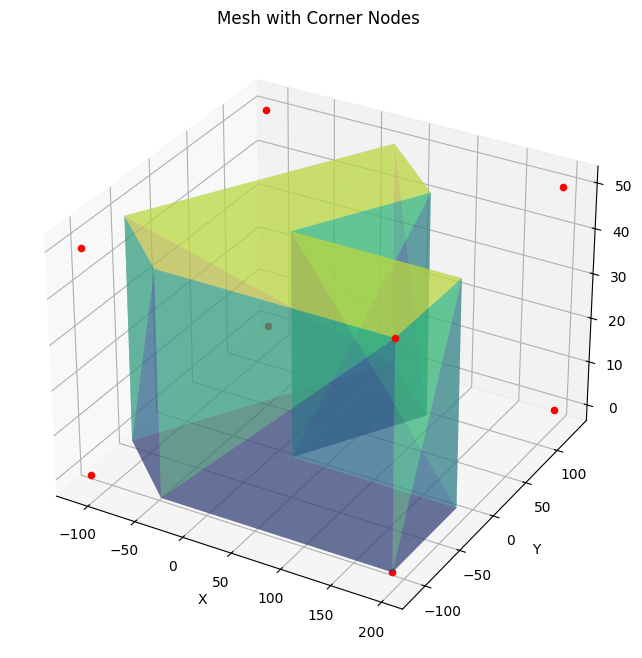

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Find the bounding box of the mesh
min_x, min_y, min_z = mesh.bounds[0]
max_x, max_y, max_z = mesh.bounds[1]

# Create a dictionary to store the corner coordinates
corners = {
    'min_x_min_y_min_z': [min_x, min_y, min_z],
    'max_x_min_y_min_z': [max_x, min_y, min_z],
    'min_x_max_y_min_z': [min_x, max_y, min_z],
    'max_x_max_y_min_z': [max_x, max_y, min_z],
    'min_x_min_y_max_z': [min_x, min_y, max_z],
    'max_x_min_y_max_z': [max_x, min_y, max_z],
    'min_x_max_y_max_z': [min_x, max_y, max_z],
    'max_x_max_y_max_z': [max_x, max_y, max_z]
}

# Print the corner coordinates
for name, coord in corners.items():
    print(f'{name}: {coord}')

import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh
ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], triangles=mesh.faces, cmap='viridis', alpha=0.5)

# Plot the corner nodes
for name, coord in corners.items():
    x, y, z = coord
    ax.scatter(x, y, z, c='red', marker='o', label=name)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the plot title
ax.set_title('Mesh with Corner Nodes')

# Add a legend
#ax.legend()

# Show the plot
plt.show()

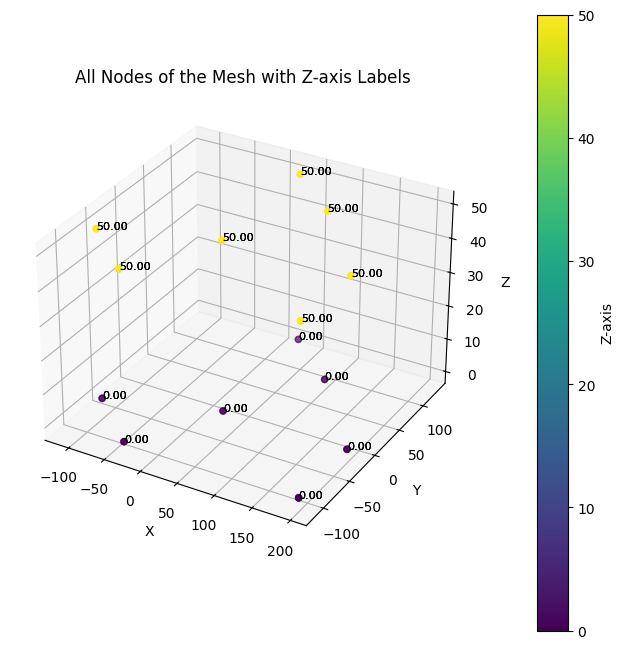

In [ ]:
fig_nodes = plt.figure(figsize=(8, 8))
ax_nodes = fig_nodes.add_subplot(111, projection='3d')

# Plot all nodes (mesh vertices) as blue dots
sc = ax_nodes.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2],
                      c=mesh.vertices[:, 2], cmap='viridis', marker='o', s=20)

# Add color bar to indicate the z-axis values
cbar = plt.colorbar(sc, ax=ax_nodes, pad=0.1)
cbar.set_label('Z-axis')

# Label each node with its z-coordinate
for i, vertex in enumerate(mesh.vertices):
    x, y, z = vertex
    ax_nodes.text(x, y, z, f'{z:.2f}', color='black', fontsize=8)

ax_nodes.set_xlabel('X')
ax_nodes.set_ylabel('Y')
ax_nodes.set_zlabel('Z')
ax_nodes.set_title('All Nodes of the Mesh with Z-axis Labels')

plt.show()

In [ ]:
# Define a section for the beams
Iy = 100  # Moment of inertia about the y-axis (in^4)
Iz = 100  # Moment of inertia about the z-axis (in^4)
J = 50    # Torsional constant (in^4)
A = 10    # Area (in^2)
model.add_rectangular_section("Beam_Section", 10, 10)

# Extract edges (beams) from faces
for edge in mesh.edges:
    node1, node2 = edge
    model.add_member(f"Beam_{node1}_{node2}", nodes[node1], nodes[node2], "Steel", "Beam_Section")

print("Beams added to the model successfully!")

AttributeError: 'FEModel3D' object has no attribute 'add_rectangular_section'

In [ ]:

import trimesh
from Pynite.FEModel3D import FEModel3D
import os

obj_path = r'../Reference Files/3d model for detection.obj'
print(obj_path)

mesh = trimesh.load(obj_path)

#Create a new PyNite model
model = FEModel3D()

# Define a 'Steel' material to prevent the NameError
E = 29000       # Modulus of elasticity (ksi)
G = 11200       # Shear modulus of elasticity (ksi)
nu = 0.3        # Poisson's ratio
rho = 2.836e-4  # Density (kci)
model.add_material('Steel', E, G, nu, rho)

# Extract vertices (nodes)
nodes = {}
for i, vertex in enumerate(mesh.vertices):
    x, y, z = vertex
    node_name = f"N{i}"
    model.add_node(node_name, x, y, z)
    nodes[i] = node_name  # Store node names for reference

# Extract edges (beams) from faces
for edge in mesh.edges:
    node1, node2 = edge
    model.add_member(f"Beam_{node1}_{node2}", nodes[node1], nodes[node2], "Steel", "Beam_Section")

print("OBJ Imported Successfully!")


../Reference Files/3d model for detection.obj


NameError: No section names 'Beam_Section'